# 1956-2016來台旅客人數統計 #

Data Soure:政府開放資料平台-歷年來台旅客統計

旅客分為兩類做統計，分別為:外籍旅客籍華裔旅客。

These table represents the number of visitors to Taiwan. It is divided into two categories: foreign tourists and Chinese tourists.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#設字體
#from matplotlib.font_manager import FontProperties 
#設定中文字體 
#myfont = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\msjh.ttf') 

tourist_data = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=7322&md5_url=75b640397916e1d9ed2e308abbc0eb7b')
tourist_data.head()

,年別,總計人數,總計成長率,總計指數,外籍旅客人數,外籍旅客成長率,外籍旅客占總計百分比,華僑旅客人數,華僑旅客成長率,華僑旅客占總計百分比
0,1956,"14,974",-,0.81,"11,734",-,78.36,"3,240",-,21.64
1,1957,"18,159",21.27,0.98,"14,068",19.89,77.47,"4,091",26.27,22.53
2,1958,"16,709",-7.99,0.90,"15,557",10.58,93.11,"1,152",-71.84,6.89
3,1959,"19,328",15.67,1.04,"17,634",13.35,91.24,"1,694",47.05,8.76
4,1960,"23,636",22.29,1.27,"20,796",17.93,87.98,"2,840",67.65,12.02


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


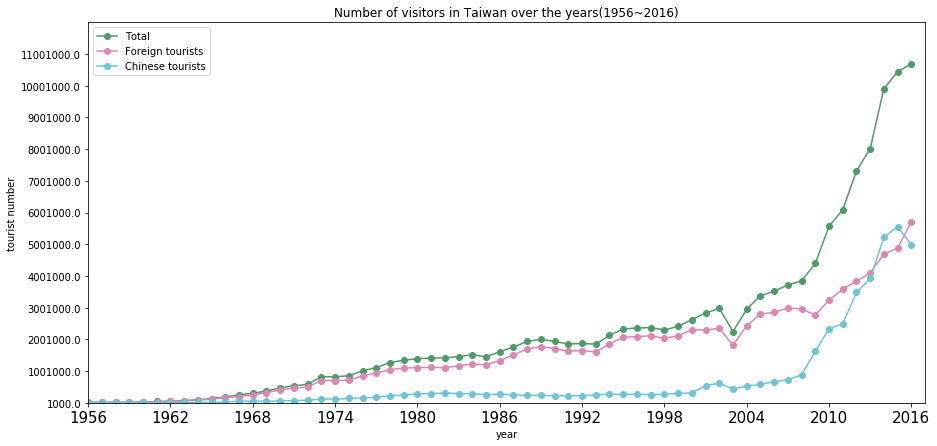

In [3]:
'''
for (i, row) in tourist_data.iterrows():
    tourist_data['總計人數'][i]=(int)(row['總計人數'].replace(',',''))
    tourist_data['外籍旅客人數'][i]=(int)(row['外籍旅客人數'].replace(',',''))
    tourist_data['華僑旅客人數'][i]=(int)(row['華僑旅客人數'].replace(',',''))
    
plt.plot(tourist_data['年別'], tourist_data['總計成長率'].apply(float), '-o')
plt.plot(tourist_data['年別'], tourist_data['外籍旅客成長率'].apply(float), '-o')
plt.plot(tourist_data['年別'], tourist_data['華僑旅客成長率'].apply(float), '-o')

'''
#大小(框)
fig = plt.figure(figsize=(15, 7))

#(1*1的第1個)
ax1 = fig.add_subplot(111)

#str中除掉逗號
for (i, row) in tourist_data.iterrows(): 
    tourist_data['總計人數'][i]=row['總計人數'].replace(',','') 
    tourist_data['外籍旅客人數'][i]=row['外籍旅客人數'].replace(',','') 
    tourist_data['華僑旅客人數'][i]=row['華僑旅客人數'].replace(',','')
    
#X軸顯示1956-2016
plt.xlim(1956, 2017)
#e=10^?,y軸1000-11001000
plt.ylim(1e3, 12e6)

#range1956-2016間隔為6
plt.xticks(np.arange(1956,2017,6),['{}'.format(x) for x in np.arange(1956, 2017, 6)],fontsize=15)

#range1000-11001000間隔為10^6
plt.yticks(np.arange(1e3, 12e6, 1e6),np.arange(1e3, 12e6, 1e6))

#折線圖，r,g--color,'-'－線,'o'－點
plt.plot(tourist_data['年別'], tourist_data['總計人數'].apply(int), '-o',label="all tourists",color='#4E9A69')
plt.plot(tourist_data['年別'], tourist_data['外籍旅客人數'].apply(int), 'r-o',label="foreign tourists",color='#DC87AF')
plt.plot(tourist_data['年別'], tourist_data['華僑旅客人數'].apply(int), 'g-o',label="asian tourists",color='#6EC3D5')

#圖表title
plt.title("Number of visitors in Taiwan over the years(1956~2016)")

#x軸
plt.xlabel('year')

#y軸
plt.ylabel('tourist number')

#圖例
plt.legend(labels=['Total','Foreign tourists', 'Chinese tourists'])
plt.show()




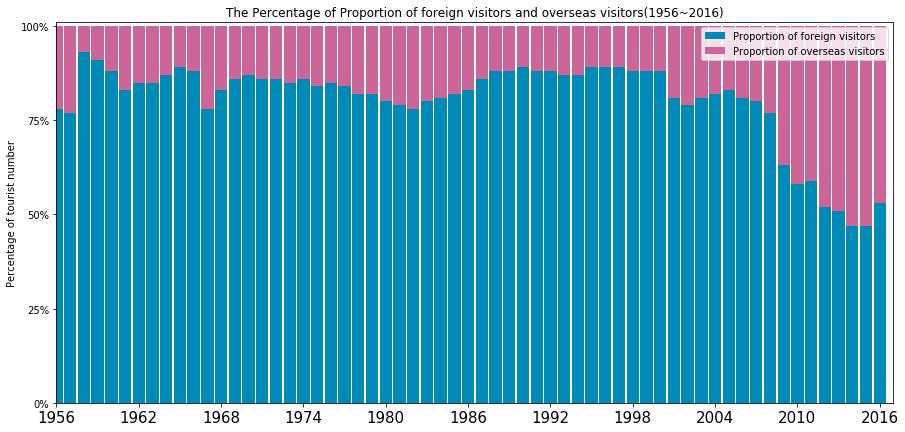

In [4]:
fig = plt.figure(figsize=(15, 7)) 

#
plt.bar(tourist_data['年別'], round(tourist_data['外籍旅客占總計百分比']/100,2), 
color=['#008AB8'], width=0.9, align='center', edgecolor='none',label="foreign tourist")

#取道小數第2位
plt.bar(tourist_data['年別'], round(tourist_data['華僑旅客占總計百分比']/100,2), bottom=round(tourist_data['外籍旅客占總計百分比']/100,2), 
color=['#CC6699'], width=0.9, align='center', edgecolor='none',label="asian tourist") 

#圖表title
plt.title("The Percentage of Proportion of foreign visitors and overseas visitors(1956~2016)") 

plt.xlim(1956, 2017) 
plt.ylim(0,1.01) 
plt.xticks(np.arange(1956,2017,6),['{}'.format(x) for x in np.arange(1956, 2017, 6)],fontsize=15) 
plt.yticks(np.arange(0, 1.01, 0.25), 
['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)]) 

plt.ylabel('Percentage of tourist number') 
plt.legend(labels=['Proportion of foreign visitors', 'Proportion of overseas visitors'])